**Consider the life.csv dataset listing the male and female life expectancy in years for various
locations and years. Undertake a simple linear regression analysis to predict the female life
expectancy based on the male life expectancy. Test your model by predicting the female life
expectancy for a male life expectancy of 90 years. Expected value of 96.44 years.**

In [19]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

pwd = os.getcwd()

df = pd.read_csv(pwd + '/life.csv')
df.head()

,location,year,male,female
0,AUS,1960,67.9,73.9
1,AUS,1961,68.0,74.4
2,AUS,1962,67.8,74.2
3,AUS,1963,67.9,74.2
4,AUS,1964,67.5,73.9


In [ ]:
# statistical overview
df.describe()

,year,male,female
count,2240.000000,2240.000000,2240.000000
mean,1989.157589,69.511652,75.596116
std,15.775974,6.980965,7.407844
min,1960.000000,41.900000,40.400000
25%,1976.000000,66.400000,73.600000
50%,1990.000000,70.700000,77.100000
75%,2003.000000,74.400000,80.500000
max,2016.000000,81.600000,87.100000


Text(0.5, 0, 'female')

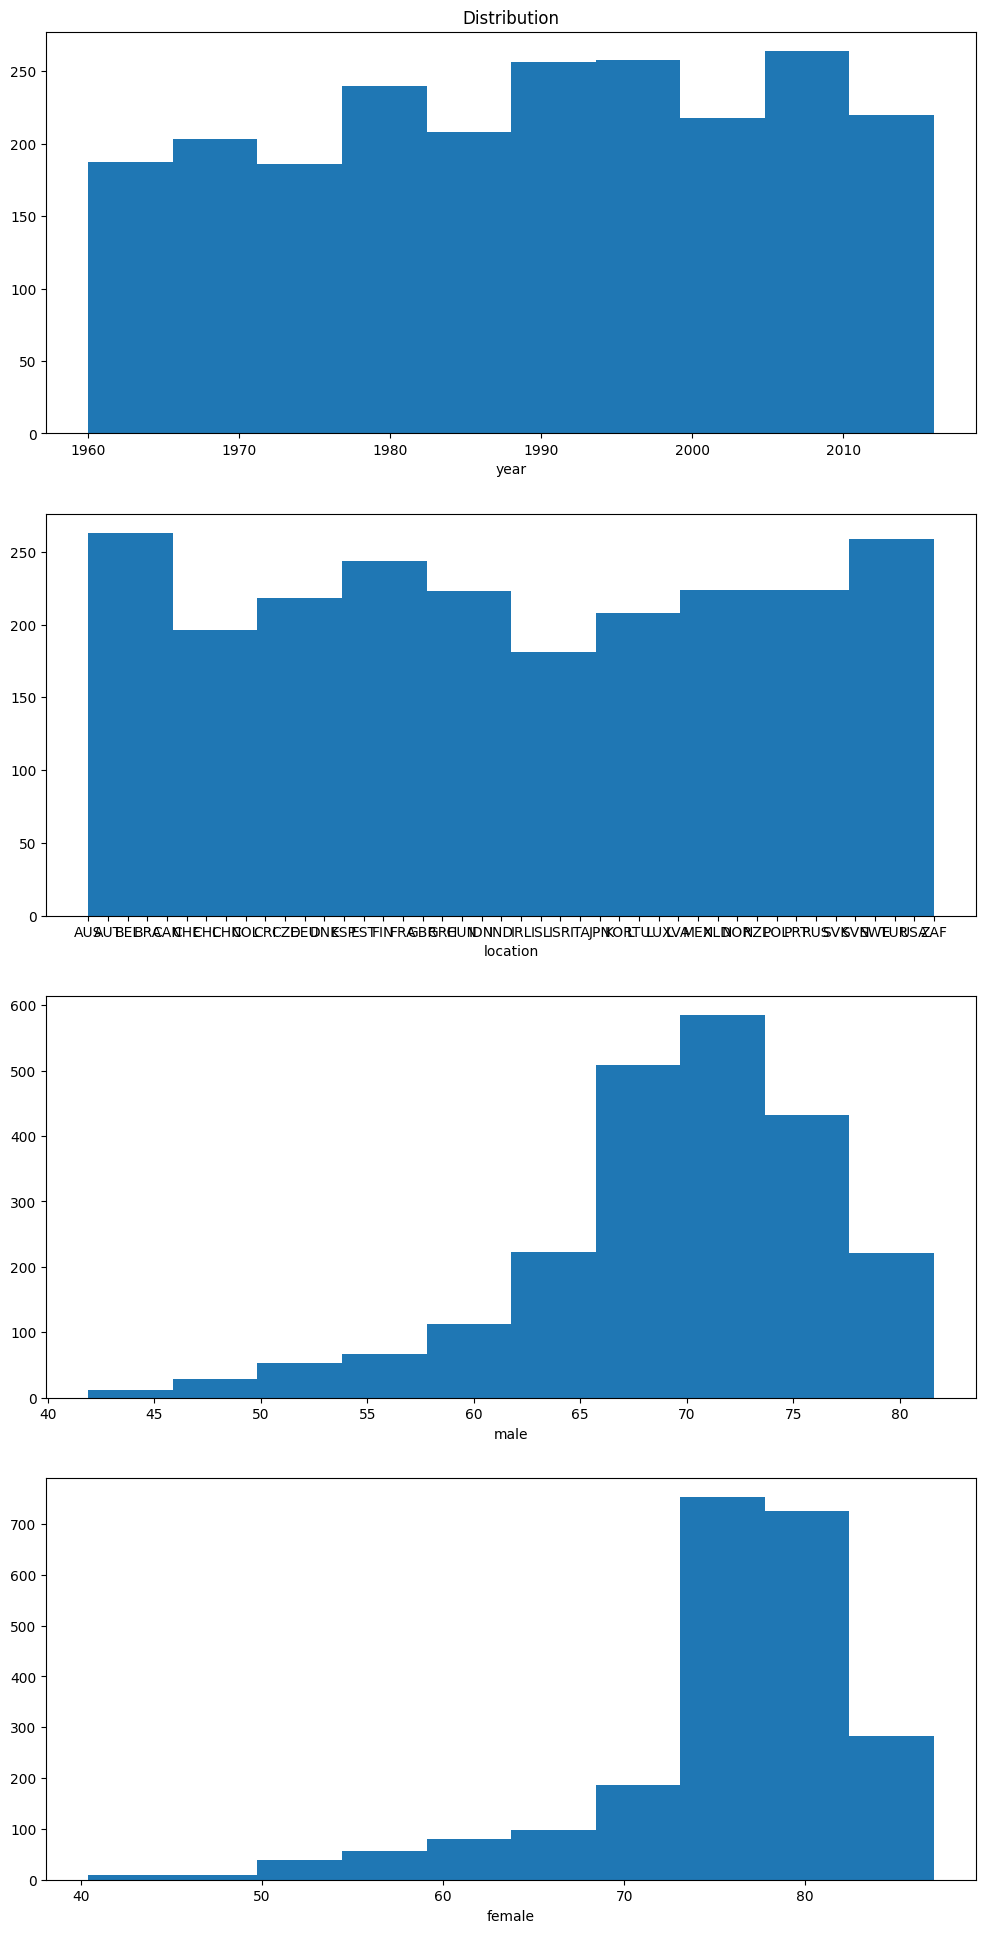

In [24]:
# histograms

fig, ax = plt.subplots(4,1, figsize=(12,24))

ax[0].hist(df['year'])
ax[0].set_title('Distribution')
ax[0].set_xlabel('year')

ax[1].hist(df['location'])
ax[1].set_xlabel('location')

ax[2].hist(df['male'])
ax[2].set_xlabel('male')

ax[3].hist(df['female'])
ax[3].set_xlabel('female')

In [25]:
df.head()

,location,year,male,female
0,AUS,1960,67.9,73.9
1,AUS,1961,68.0,74.4
2,AUS,1962,67.8,74.2
3,AUS,1963,67.9,74.2
4,AUS,1964,67.5,73.9


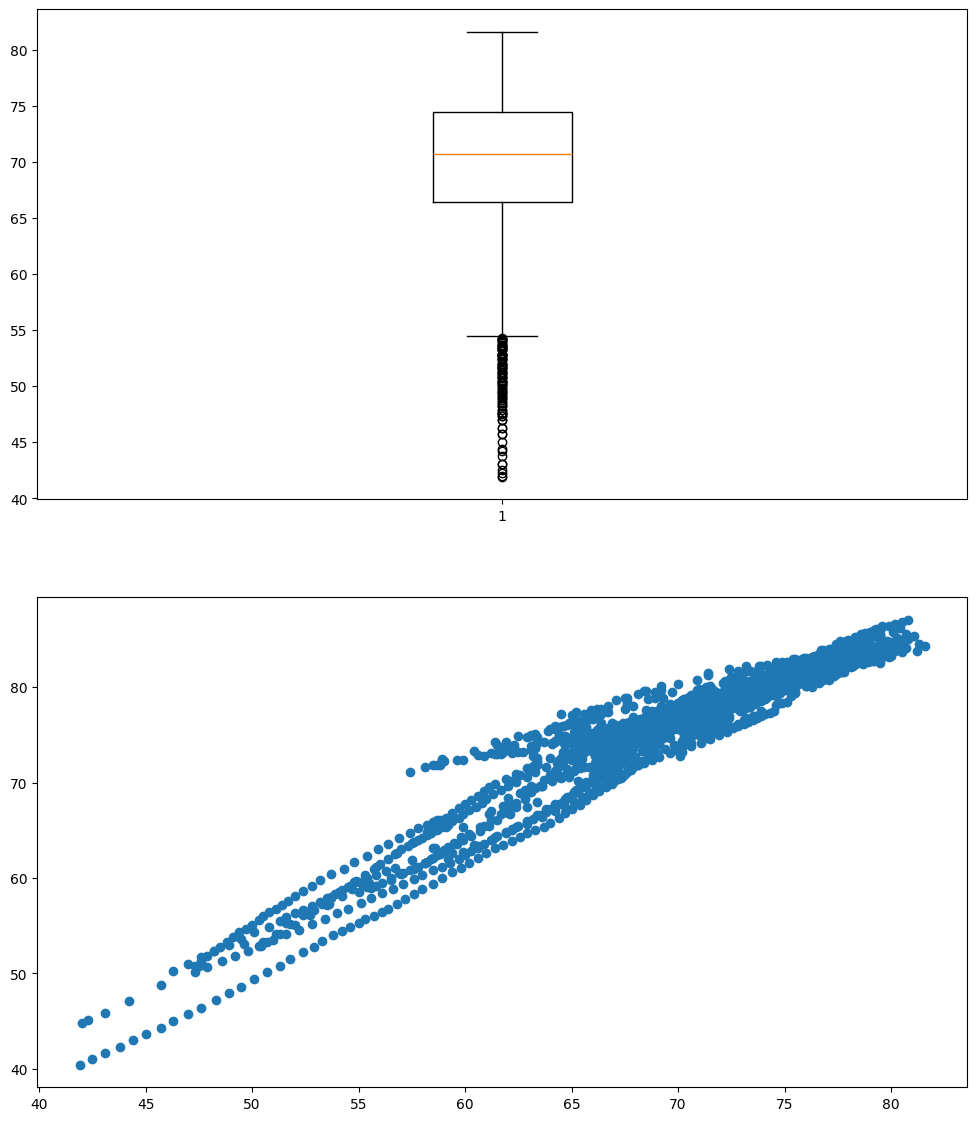

In [31]:
# scatter plots and box plots
fig, ax = plt.subplots(2,1, figsize=(12,14))

ax[0].boxplot(df['male'])

ax[1].scatter(df['male'], df['female'])



In [33]:
# correlation analysis
df[['male','female']].corr()

,male,female
male,1.000000,0.958512
female,0.958512,1.000000


In [34]:
# regression analysis
import statsmodels.formula.api as smf

formula = 'female ~ male'

model = smf.ols(formula=formula, data=df).fit()

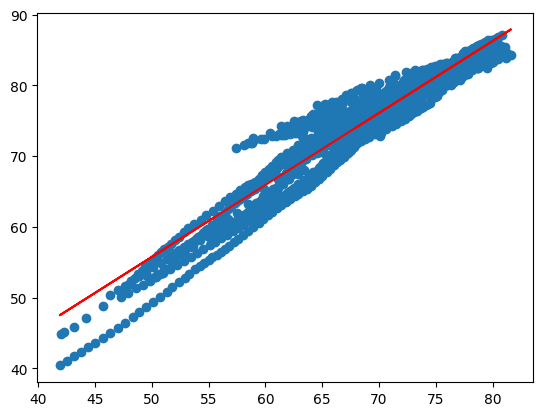

In [38]:
# visualization of results

plt.scatter(df['male'], df['female'])
plt.plot(df['male'], model.fittedvalues, color='red')


In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 female   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                 2.530e+04
Date:                Wed, 13 Nov 2024   Prob (F-statistic):               0.00
Time:                        09:22:24   Log-Likelihood:                -4852.2
No. Observations:                2240   AIC:                             9708.
Df Residuals:                    2238   BIC:                             9720.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.8941      0.447     10.956      0.000       4.018       5.770
male           1.0171      0.006    159.075      0.000       1.005       1.030
==============================================================================
Omnibus:                      107.706   Durbin-Watson:                   0.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.668
Skew:                           0.315   Prob(JB):                     2.21e-50
Kurtosis:                       4.433   Cond. No.                         699.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# function creation

def predict_female_life_expectancy(alpha, beta, male):
    return alpha + beta * male

In [42]:
print('Female life expectancy when male life expectancy is: {:.0f} years: {:.0f} years'
        .format( 90, \
            predict_female_life_expectancy(model.params.iloc[0], model.params.iloc[1], 90)))

Female life expectancy when male life expectancy is: 90 years: 96 years
